In [29]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

In [30]:
df = pd.read_csv("../data/clean/census.csv")

In [31]:
categorical_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
numerical_features = ["age", "hours-per-week"]
target = "salary"

In [32]:
df['salary'].value_counts()

salary
<=50K    24698
>50K      7839
Name: count, dtype: int64

In [33]:
X = df[categorical_features + numerical_features]
y = df[target]

In [34]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
df_temp = pd.concat([X_temp, y_temp], axis=1)

In [36]:
del X_temp, y_temp

In [37]:
df_temp

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,hours-per-week,salary
1216,Self-emp-not-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,United-States,48,40,>50K
27941,Private,Bachelors,Never-married,Sales,Not-in-family,White,Male,United-States,31,40,<=50K
23063,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,50,50,>50K
19670,Private,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,United-States,22,45,<=50K
19172,Private,HS-grad,Never-married,Exec-managerial,Not-in-family,White,Female,United-States,28,45,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
29802,Private,Prof-school,Married-civ-spouse,Sales,Wife,White,Female,United-States,38,40,<=50K
5390,Private,Bachelors,Widowed,Adm-clerical,Not-in-family,White,Female,United-States,63,25,<=50K
860,Private,11th,Never-married,Adm-clerical,Own-child,White,Female,United-States,18,20,<=50K
15795,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,34,50,<=50K


In [38]:
df_temp["salary"].value_counts()

salary
<=50K    17293
>50K      5482
Name: count, dtype: int64

In [39]:
df_temp = pd.concat(
    [df_temp[df_temp["salary"] == "<=50K"].sample(5482), 
     df_temp[df_temp["salary"] == ">50K"]]
)

In [40]:
df_temp["salary"].value_counts()

salary
<=50K    5482
>50K     5482
Name: count, dtype: int64

In [41]:
X_train = df_temp[categorical_features+numerical_features]
y_train = df_temp[target]

In [42]:
column_transformer = ColumnTransformer(
    transformers=[
        # name, transformer, columns
        ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
        # Ignore numerical columns
        remainder='passthrough'
)

In [43]:
classifier = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    max_depth=15,
    max_features="sqrt",
    random_state=42
    )

In [44]:
pipeline = Pipeline(
    steps=[
        ('one-hot-encoder', column_transformer),
        ('classifier', classifier)
    ]
)

In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('one-hot-encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=15, n_jobs=-1,
                                        random_state=42))])

In [46]:
y_pred = pipeline.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7612169637369391


In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.95      0.72      0.82      7405
        >50K       0.50      0.88      0.64      2357

    accuracy                           0.76      9762
   macro avg       0.73      0.80      0.73      9762
weighted avg       0.84      0.76      0.78      9762



In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(y_test, y_pred)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

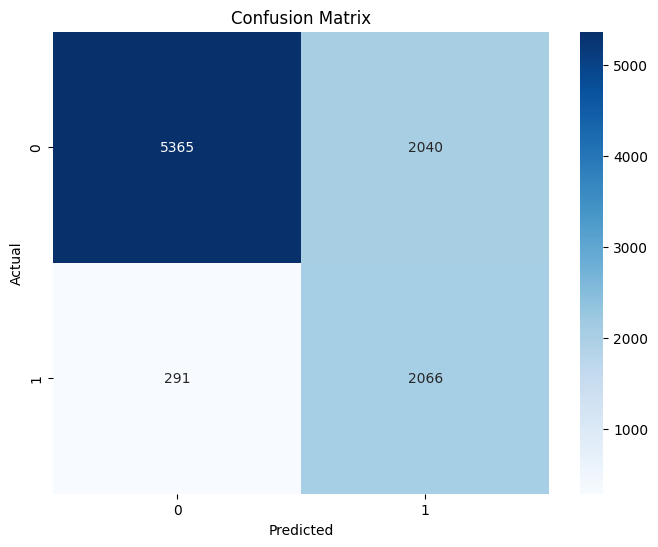

In [53]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [58]:
import joblib

joblib.dump(pipeline, "../model/inference_pipeline.pkl")

['../model/inference_pipeline.pkl']

In [59]:
model = joblib.load("../model/inference_pipeline.pkl")

df = pd.read_csv("../data/clean/census.csv")

X = df[numerical_features + categorical_features]

In [60]:
model.predict(X)

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)